# Statistical Thinking in Python (Part 1)
- William Surles
- 2017-11-22
- Datacamp class
- [https://www.datacamp.com/courses/statistical-thinking-in-python-part-1](https://www.datacamp.com/courses/statistical-thinking-in-python-part-1)

## Whats covered

- **Graphical exploratory data analysis**
 - Introduction to exploratory data analysis
 - Plotting a histogram
 - Plotting all of your data: Bee swarm plots
 - Plotting all of your data: Empirical cumulative distribution functions
 - Onward toward the whole story  


- **Quantitative exploratory data analysis**
 - Introduction to summary statistics: The sample mean and median
 - Percentiles, outliers, and box plots
 - Variance and standard deviation
 - Covariance and Pearson correlation coefficient  


- **Thinking probabillistically - Discrete variables**
 - Probabilistic logic and statistical inference
 - Random number generators and hacker statistics
 - Probability distributions and stories: The Binomial distribution
 - Poisson processes and the Poisson distribution  


- **Thinking probabillistically - Continuous variables**
 - Probability density functions
 - Introduction to the Normal distribution
 - The Normal distribution: Properties and warnings
 - The Exponential distribution
 - Final thoughts and encouragement toward Statistical Thinking II

## Additional Resources

- [matplotlib styles](https://matplotlib.org/api/pyplot_api.html)
- [latex notation for sums and things](https://www.sharelatex.com/learn/Integrals,_sums_and_limits)
- [latex math symbols](https://reu.dimacs.rutgers.edu/Symbols.pdf)

## Libraries and Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Graphical exploratory data analysis

## Introduction to exploratory data analysis

#### Exporatory data analysis
 - the process of organizing, plotting, and summarizing a data set
 - Developed by one of the 'greatest statisticians of all time' John Tukey
 - He wrote a book 'Exploratory data analysis' in 1977 (dang)
 - "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone." - Tukey

### Tukey's comments on EDA

Tukey's quotes about EDA:
 - Exploratory data analysis is detective work.
 - There is no excuse for failing to plot and look.
 - The greatest value of a picture is that it forces us to notice what we never expected to see.
 - It is important to understand what you can do before you learn how to measure how well you seem to have done it.

### Advantages of graphical EDA

True statements about graphical EDA:
- It often involves converting tabular data into graphical form.
- If done well, graphical representations can allow for more rapid interpretation of data.
- There is no excuse for neglecting to do graphical EDA.

## Plotting a histogram

- Using `_` when creating a hist will prevent extra output
 - `_ = plt.hist(data)`
 - `_ = plt.xlabel('whatever')`
- Always label you axes, and use units too!
- The the number of `bins` or `bin_edges` so that the bars line up in an interpretable way.
- matplotlib is a common base plotting library, but the instructor prefers to style things with seaborn (mee too!)
 - `import seaborn as sns`
 - `sns.set()`

### Plotting a histogram of iris data

#### Load the data

In [4]:
from sklearn.datasets import load_iris
iris_kit = load_iris()
iris = pd.DataFrame(data= np.c_[iris_kit['data'], iris_kit['target']],
                     columns= iris_kit['feature_names'] + ['species'])
iris['species'] = iris['species'].replace({0:'setosa', 1:'versicolor', 2:'virginica'})
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
versicolor_petal_length = iris.loc[iris.species == 'versicolor']['petal length (cm)']
versicolor_petal_length.head()

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal length (cm), dtype: float64

#### Exercise

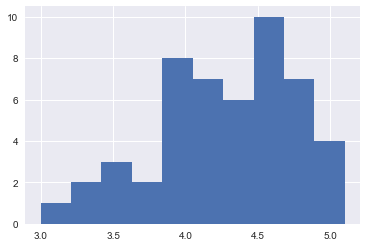

In [6]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

### Axis labels!

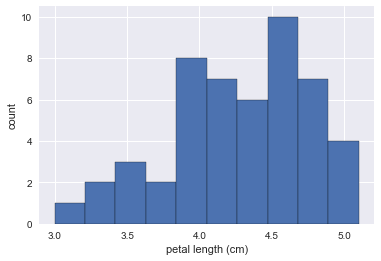

In [7]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length, edgecolor = 'k')

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')


# Show histogram
plt.show()

### Adjusting the number of bins in a histogram
- The histogram you just made had ten bins. This is the default of matplotlib. 
- The "square root rule" is a commonly-used rule of thumb for choosing number of bins: 

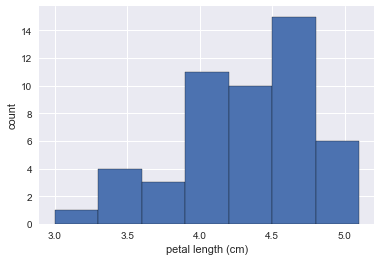

In [8]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins, edgecolor='black')

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()


## Plotting all of your data: Bee swarm plots

- One drawback of histograms is that the data can look different based on how bins are chosen
- And choice of bins is arbitrary
- This can lead to 'binning bias'
- Also we are not plotting all of the data. We sweep it into bins. Sometimes its helpful to see all data points
- A bee swarm plot is a good wa to plot all of the data for one variable
 - We can also split data by a category if we want

### Bee swarm plot

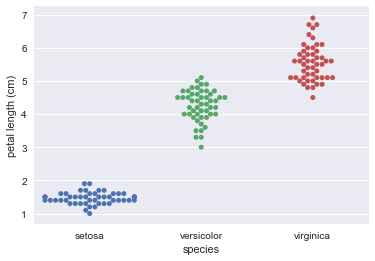

In [9]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x = 'species', y = 'petal length (cm)', data = iris)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


### Interpreting a bee swarm plot

- We can say that virginica petals tend to be the longest and setosa the shortest.

## Plotting all of your data: Empirical cumulative distribution functions

- Its possible for a bee swarm plot to loose efficacy if there is to much data
 - In order to plot all the points it will begin to overlap points on the edges
 - this obfuscates the data
- An Emperical cumulative distribution function (ECDF) is a good way to plot a distribution when there are many datapoints
 - This lets us see the percentage of points that lie below all values in the data dataset
 - The x data is simply all values sorted
 - The y axis is evenly spaced data points from 0 to 1. These represent percentages.
 - We will make as many points as there are data points in the dataset
- The instructor almost always plots the ECDF first
 - It plots all of the data and gives a good picture of how the data is distributed

### Computing the ECDF

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Plotting the ECDF

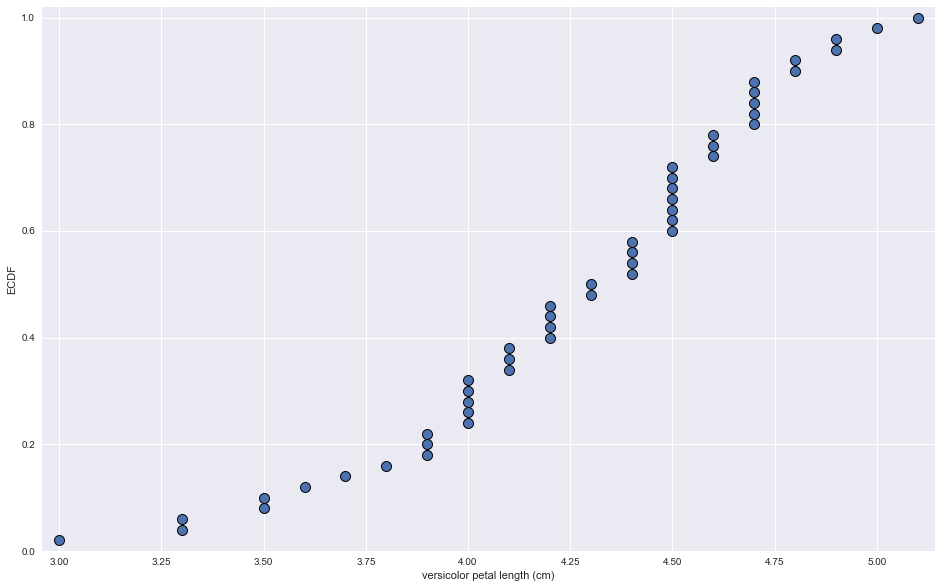

In [11]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(iris['petal length (cm)'][iris.species == 'versicolor'])

plt.figure(figsize=(16,10))

# Generate plot
plt.plot(
    x_vers, y_vers,
    marker = 'o',
    markersize = 10,
    markeredgecolor='black',
    markeredgewidth=1,
    linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
plt.xlabel('versicolor petal length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.show()



### Comparison of ECDFs

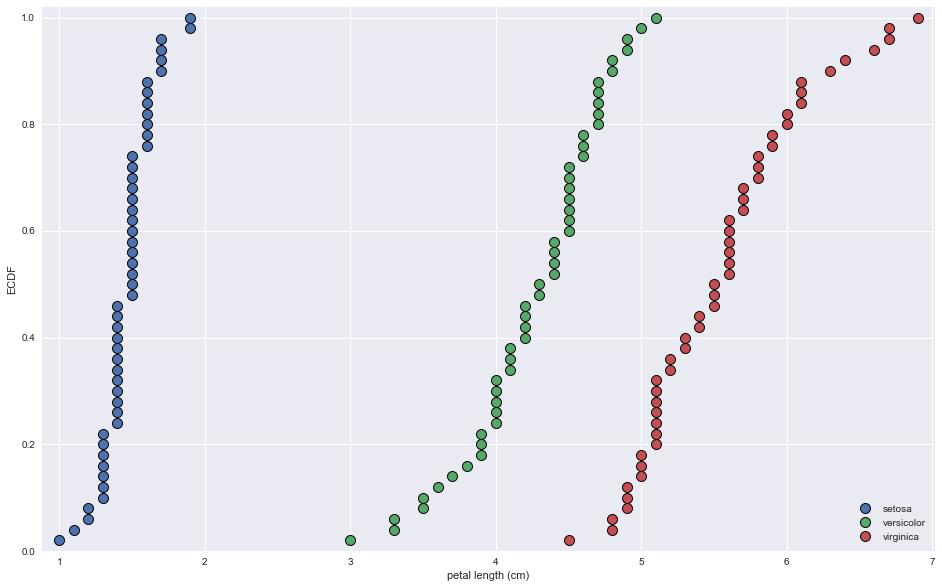

In [12]:
# Compute ECDFs
x_set, y_set = ecdf(iris['petal length (cm)'][iris.species == 'setosa'])
x_vers, y_vers = ecdf(iris['petal length (cm)'][iris.species == 'versicolor'])
x_virg, y_virg = ecdf(iris['petal length (cm)'][iris.species == 'virginica'])

# Plot all ECDFs on the same plot
plt.figure(figsize=(16,10))

plt.plot(
    x_set, y_set,
    marker = 'o',
    markersize = 10,
    markeredgecolor='black',
    markeredgewidth=1,
    linestyle = 'none')

plt.plot(
    x_vers, y_vers,
    marker = 'o',
    markersize = 10,
    markeredgecolor='black',
    markeredgewidth=1,
    linestyle = 'none')

plt.plot(
    x_virg, y_virg,
    marker = 'o',
    markersize = 10,
    markeredgecolor='black',
    markeredgewidth=1,
    linestyle = 'none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Quantitative exploratory data analysis

## Introduction to summary statistics: The sample mean and median

- The median is a generally a good measure of the middle of the data
 - But it can be tugged one way by extreme datapoints
- The mean is much more robust to extreme points

### Computing means

In [13]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(iris['petal length (cm)'][iris.species == 'versicolor'])

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


And just for camparison here is the median...

In [14]:
np.median(iris['petal length (cm)'][iris.species == 'versicolor'])

4.3499999999999996

## Percentiles, outliers, and box plots

- the mean is just another term for the 50th percentile of the data
 - percentiles are very useful summary statistics to quickly understand the distribution of data

#### Box Plots
- Data
 - Show the 50th percentile in the middle
 - the box extends to the 75th and 25th percentiles
 - This is the middle 50% of the data, also known as the inter quartile range (IQR)
 - The whiskers extend to 1.5 times the IQR or to the extend of the data
 - Anything outside 1.5x the IQR is plotted as a point. These can be considered outliers (conservative outliers I guess)
 - Keep in mind that outliers are not necessaryily errouneous datapoints. they may be, but don't assume they are unless you have a very good reason to do so. 
- Use
 - These are great alternatives to the bee swarm plot when the data is large
 - And they are just good in generaly to quickly see the distribution of the data

### Computing percentiles

In [15]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[ 3.3     4.      4.35    4.6     4.9775]


### Comparing percentiles to ECDF

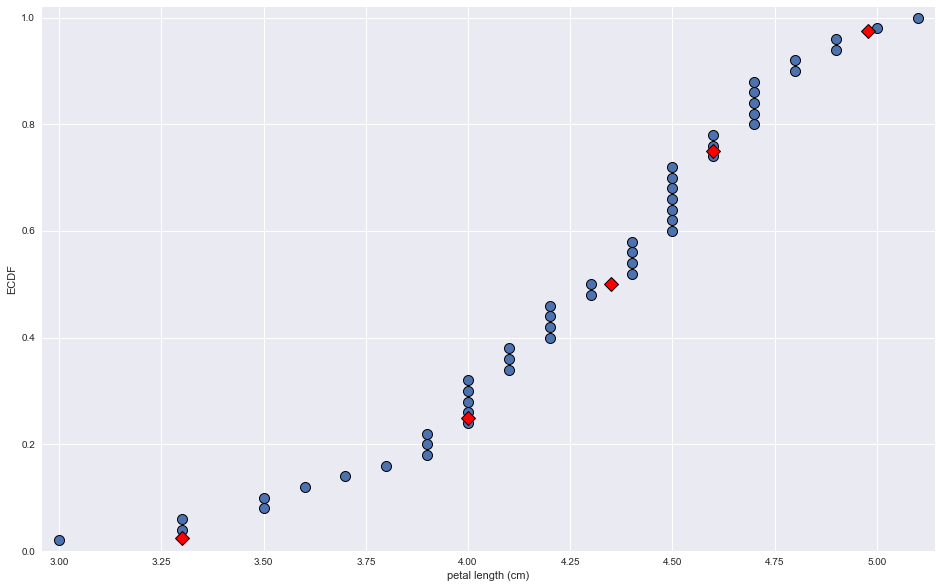

In [16]:
# Plot the ECDF
plt.figure(figsize=(16,10))

plt.plot(
    x_vers, y_vers,
    marker = 'o',
    markersize = 10,
    markeredgecolor='black',
    markeredgewidth=1,
    linestyle = 'none')

plt.margins(0.02)
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
plt.plot(
    ptiles_vers, 
    percentiles/100, 
    marker='D', 
    markersize = 10,
    color='red',
    markeredgecolor='black',
    markeredgewidth=1,
    linestyle='none')

# Show the plot
plt.show()



### Box-and-whisker plot

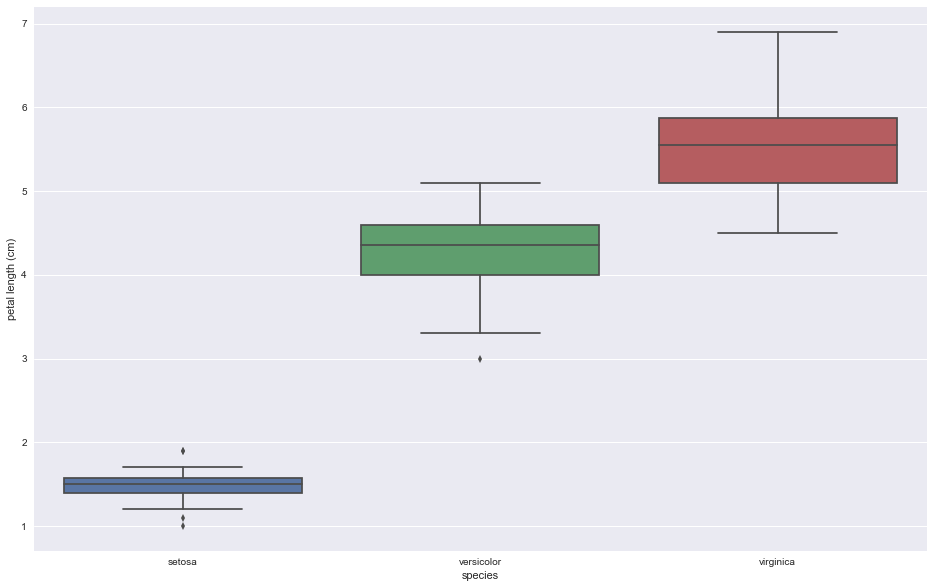

In [17]:
# Create box plot with Seaborn's default settings
plt.figure(figsize=(16,10))
sns.boxplot(
    x='species', 
    y = 'petal length (cm)',
    data = iris)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


## Variance and standard deviation

- `mean` captures the 'maginitude' of the data 
- `standard deviation` and `variance` capture the 'variability' or 'spread' of the data
- variance 
 - the mean squared distance of the data from the mean
 - this means we take every datapoint, measure its distance from the mean, square that, and take an average of all
 - but this has different units than the data itself (its squared)
- standard deviation
 - the square root of the variance
 - this is in the same units as the data


### Computing the variance

In [18]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_np, variance_explicit)


0.2164 0.2164


### The standard deviation and the variance

In [19]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))


0.465188133985
0.465188133985


## Covariance and Pearson correlation coefficient

- Covariance is a measure of how two quantities vary together
- for example, with voter data, if many of the data points are higher than the mean percent for Obama and higher than the mean total votes and conversly lower than both means, you have a positive covariance. 

$$ covariance = \frac{1}{n}\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y})} $$

- the pearson correlation coefficient is the covariance divided by the std of x times the std of y
- In esseence this makes the value fall between -1 and 1

$$ \rho = Pearson\ correlation = \frac{covariance}{(std\ of\ x)(std\ of\ y)} = \frac{variability\ due\ to\ codependence}{independent\ variability} $$

### Scatter plots

In [20]:
versicolor_petal_width = iris['petal width (cm)'][iris.species == 'versicolor']

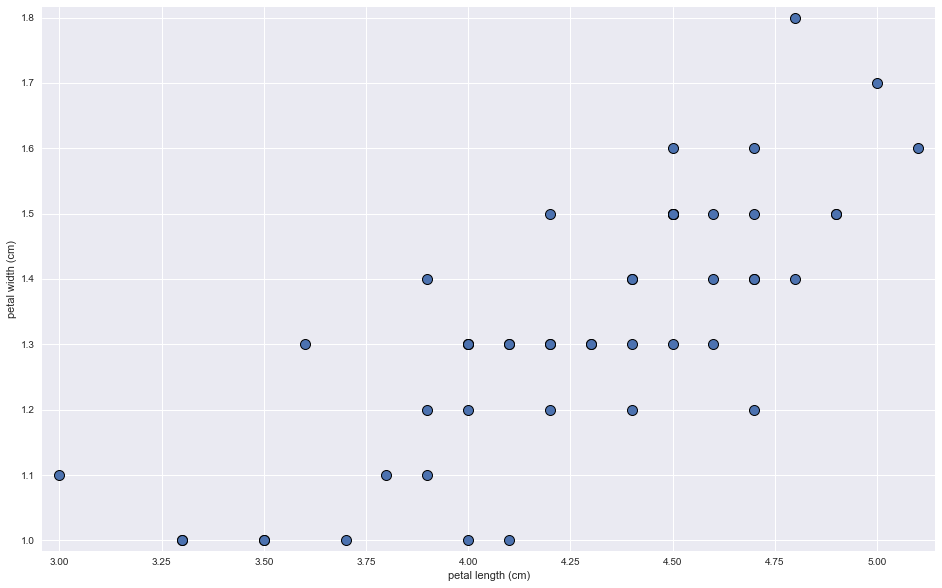

In [21]:
# Make a scatter plot
plt.figure(figsize=(16,10))

plt.plot(
    versicolor_petal_length,
    versicolor_petal_width,
    markersize = 10,
    markeredgecolor='black',
    markeredgewidth=1,
    marker = 'o',
    linestyle = 'none'
    )

# Set margins
plt.margins(0.02)

# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# Show the result
plt.show()

### Computing the covariance

In [22]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

[[ 0.22081633  0.07310204]
 [ 0.07310204  0.03910612]]


In [23]:
# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

0.0731020408163


### Computing the Pearson correlation coefficient

In [24]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)


0.786668088523


# Thinking probabilistically -- Discrete variables

## Probabilistic logic and statistical inference

- Probabilistic logic
 - given a set of data you describe probabilistically what you might expect if those data were acquired again, and again, and again, etc
- statistical inference 
 - it is the process by which we go from measured data to probalisitic conclusions about what we might expect if we collected the same data again

### What is the goal of statistical inference?

- To draw probabilistic conclusions about what we might expect if we collected the same data again.
- To draw actionable conclusions from data.
- To draw more general conclusions from relatively few data or observations.

### Why do we use the language of probability?

- Probability provides a measure of uncertainty.
- Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.

## Random number generators and hacker statistics

#### Hacker statistics
- Uses simulated repeated measurements to compute probabilites
- Instead of literally repeating the data aquisition process over and over again, we can simulate those repeated measurements using python 
- We will start with... you guessed it, A coin flip example : )

#### The np.random module
- Suite of functions based on random number generation
- np.random.random():
 - draw a number between 0 and 1
- We will assume
 - value < 0.5 = heads
 - value >= 0.5 = tails

#### Bernoulli trial
- An experiment that has two options, "success" (True) and "failure" (False)

#### Random number seed
- Integer fed into random number generating algorithm
- given the same number the same 'random' number will be generated
- Pseudo random number generation is very useful for reproducability
- Specified using `np.random.seed()`

#### Simulating 4 coin flips

In [25]:
np.random.seed(42)
random_numbers = np.random.random(size = 4)
random_numbers

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848])

In [26]:
heads = random_numbers < 0.5
heads

array([ True, False, False, False], dtype=bool)

In [27]:
np.sum(heads)

1

#### Simulating this 10,000 times

In [28]:
n_all_heads = 0

for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads +=1
        
n_all_heads /10000

0.0619

- Bernoulli and his friends did this on paper. Sheesh
- We have computers, so statistics is pretty much easy now. ; )

#### Hacker statistics probabilities
- Determine how to simulate data
- Simulate many many times
- Probability is approximately fration of trials with the outcome of interest

### Generating random numbers using the np.random module

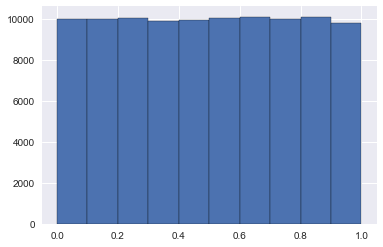

In [29]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers, edgecolor = 'k')

# Show the plot
plt.show()


### The np.random module and Bernoulli trials

In [30]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

### How many defaults might we expect?

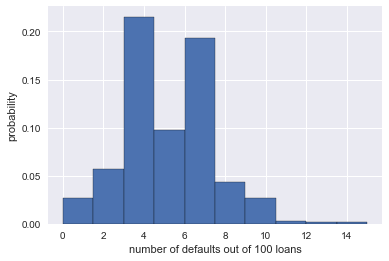

In [31]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True, edgecolor = 'k')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


### Will the bank fail?

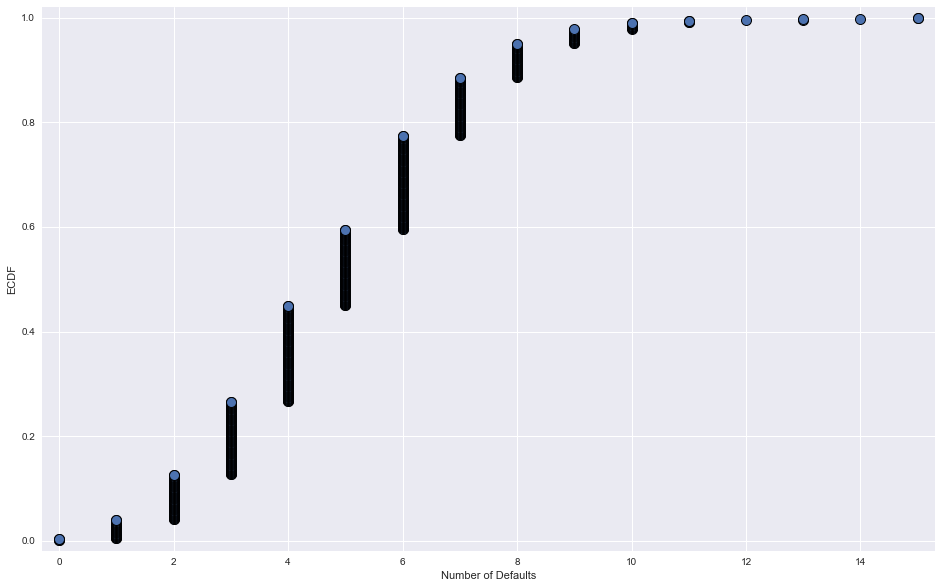

Probability of losing money = 0.022


In [32]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.figure(figsize=(16,10))

plt.plot(
    x, y,
    marker = 'o',
    markersize = 10,
    markeredgecolor='k',
    markeredgewidth=1,
    linestyle = 'none')
plt.margins(0.02)
plt.xlabel('Number of Defaults')
plt.ylabel('ECDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


## Probability distributions and stories: The Binomial distribution

#### probability Mass funciton (PMF)
- This is a bit hard to follow so let me take it step by step
- In the last video we simulated a story about a person flipping a coin
- We did this to get the probability of each possible outcome of the story (flipping a coin 4 times)
 - We did not show the probability of each outcome but we did see there is a 0.0621% chance of getting 4 heads.
- That set of probabilities is called a probability mass function (PMF)
    - A PMF is defined as the set of probabilities of discrete outcomes
- Lets consider a new story, a person rolling a die
 - Discrete - The outcome is discrete because there are set outcomes. e.g. rolling a one, or rolling a 4.
 - Uniform - Each result has the same probability. (that would not be so with 2 die)
 - The PMF associated with this story (rolling 1 die) is called the discrete uniform PMF
- "The PMF is a property of the discrete probability distribution". huh?
 - A distributon is just a mathematical description of outcomes. sure
 - We can match a story to a mathematical description or probabilities
- the coin flip story corresponds to the binomial distribution
 - Its story goes as follows
 - The number `r` of successes in `n` Bernuoulli trials with probability `p` of success, is Binomally distributed.
 

#### Sampling from the Binomial distribution
- We can sample from a binomial distibution to simulate the coin flip story

In [34]:
np.random.binomial(4, 0.5)

2

In [66]:
np.random.seed(42)
np.random.binomial(4, 0.5, size=10)

array([2, 4, 3, 2, 1, 1, 0, 3, 2, 3])

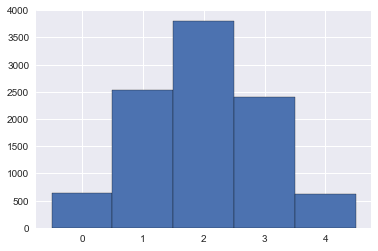

In [67]:
sample = np.random.binomial(4, 0.5, size = 10000)
bins = np.arange(6) - 0.5
plt.hist(sample, bins=bins, edgecolor = 'k')
plt.show()

#### The Binomial CDF

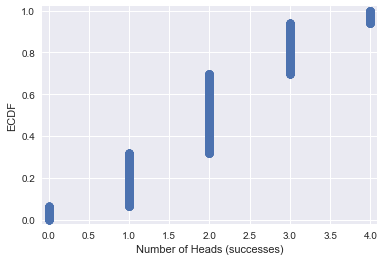

In [76]:
x, y = ecdf(sample)

plt.plot(
    x, y,
    marker = 'o',
    markersize = 8,
    linestyle = 'none')
plt.margins(0.02)
plt.xlabel('Number of Heads (successes)')
plt.ylabel('ECDF')

# Show the plot
plt.show()


### Sampling out of the Binomial distribution
- In this exercise we will sample from the binomial distribution rather than simulating all of the Bernoulli trials
- This is much more computationally efficient

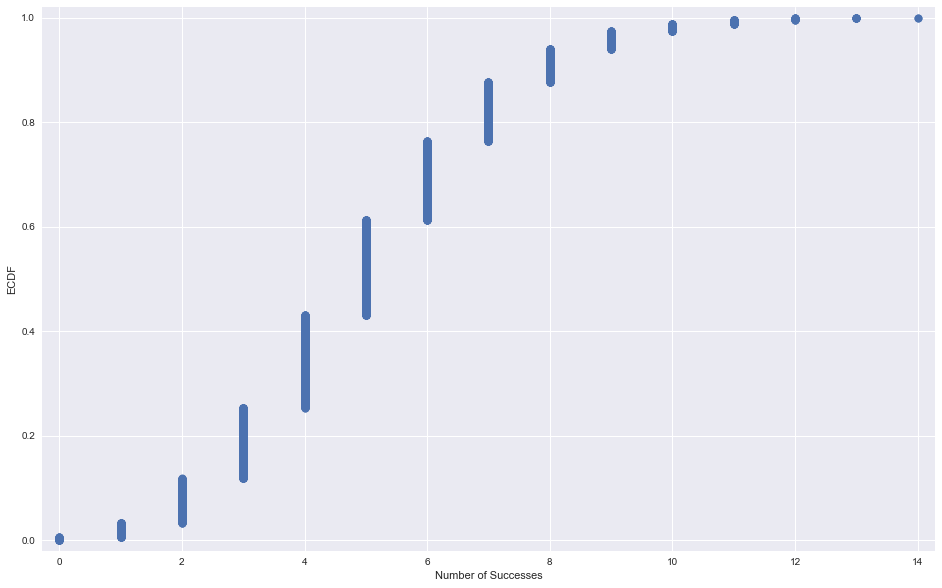

In [77]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.figure(figsize=(16,10))
plt.plot(
    x, y,
    marker = 'o',
    markersize = 8,
    linestyle = 'none')
plt.margins(0.02)
plt.xlabel('Number of Successes')
plt.ylabel('ECDF')

# Show the plot
plt.show()

### Plotting the Binomial PMF

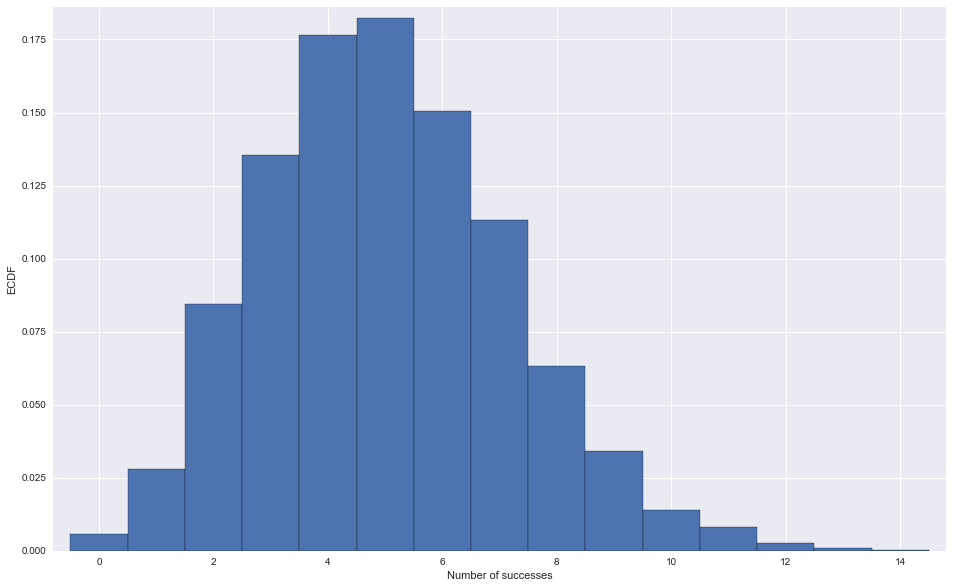

In [78]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.figure(figsize=(16,10))
plt.hist(
    n_defaults, 
    bins = bins,
    normed=True,
    edgecolor = 'k')

# Set margins
plt.margins(0.02)

# Label axes
plt.xlabel('Number of successes')
plt.ylabel('ECDF')


# Show the plot
plt.show()

## Poisson processes and the Poisson distribution

#### Poisson process
- The timing of the next event is completely independent of when the previous event happened

#### Examples
- Natural births in a given hospital
 - the average number of births in a year well defined but timings are independent of one another
- Hit on a website during a given hour
- Meteor strikes
- etc

#### Poisson Distribution
- The number `r` of arrivals of a Poisson process in a given time interval with average rate of $\lambda{}$ arrivals per interval is Poisson distributed
- It looks a lot like the binomial distribution
- This is because the poisson distribtion is a limit of the binomial distribution for low probability of success and large number trials
 - i.e. rare events 
 - (ummm, im not sure what this means yet)

#### The Poisson CDF

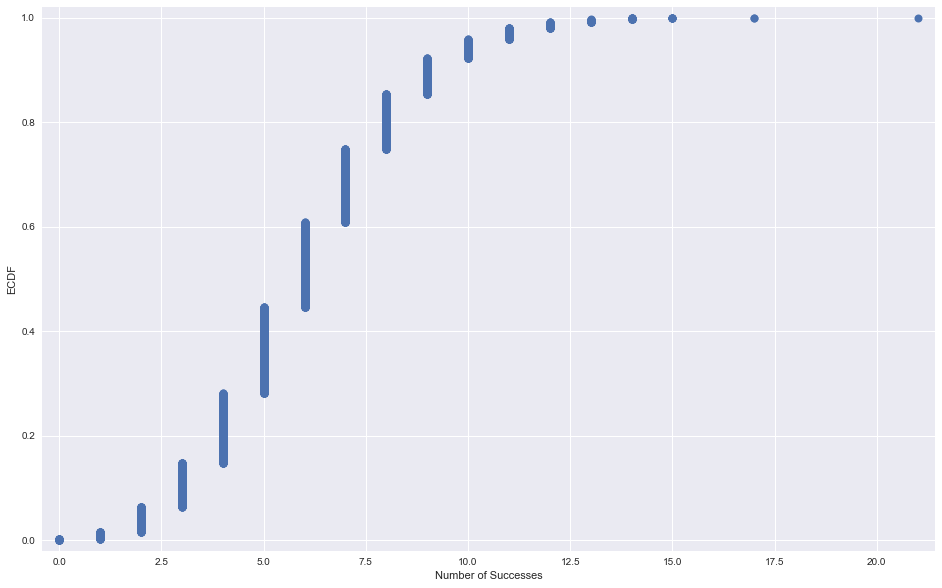

In [79]:
samples = np.random.poisson(6, size = 10000)

x, y = ecdf(samples)

plt.figure(figsize=(16,10))
plt.plot(
    x, y,
    marker = 'o',
    markersize = 8,
    linestyle = 'none')
plt.margins(0.02)
plt.xlabel('Number of Successes')
plt.ylabel('ECDF')

# Show the plot
plt.show()
                       

### Relationship between Binomial and Poisson distributions

- Say we do a Bernoulli trial every minute for an hour, each with success probability of 0.1
 - We would do 60 trials
 - The number of success is Binomially distributed 
 - We would expect to get about 6 successes
- This is just like the Poisson story we discessed in the video, where we get on average 6 hits on a website per hour
 - So, the Poisson distribution with arrival rate equal to n * p approximates a Binomial distribtion for n Bernoulli trials with probability p of success (with n large and p small).
- The poisson distribution is often simpler to work with because it has only one parameter in stead of two

In [80]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9981 3.15583529196
n = 20 Binom: 9.9937 2.24108462803
n = 100 Binom: 10.0135 3.00701143164
n = 1000 Binom: 10.0475 3.14528913615


### How many no-hitters in a season?

- There have been 251 no hitters in over 200,000 games from 1901 to 2015.
- The number of no hitters in a season can be modeled by both a binomial and poisson distribtion, though poisson is easier to model and compute. 

### Was 2015 anomalous?

In [81]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.006


# Thinking probabilistically -- Continuous variable

## Probability density functions

#### Continuous variables
- Quantities that cn take any value, not just descrete values
 - like weight of people, or speed of trains
 - Michelson's speed of light experiment

#### Probability density function (PDF)
 - Continuous analog to the PMF
 - Mathematical description of the relative likelihood of observing a value of a continuous variable
 - The likelihood of any exact value is infinitely small, but we say the area under the curve is the liklihood
 - How likely are we to observe a value at this value or smaller. We would take the area under the curve
 - This is one of the most important curves in statistics

#### Normal CDF
 - This will tell you what the percent is of observing a value this level or smaller
 - It is essentially the value of the area under the curve at each point
 - It goes from 0 to 1

## Introduction to the Normal distribution

#### Normal Distribution
 - Describes a continuous variable whose PDF has a single symmetric peak
 - I really think the best explaination is on khan academy. : ) 
 - Described by the mean and standard deviation

In [82]:
file = 'https://assets.datacamp.com/production/course_1549/datasets/michelson_speed_of_light.csv'
light = pd.read_csv(file)
light.head()

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [83]:
speed_of_light = light['velocity of light in air (km/s)']

In [84]:
speed_of_light[:6]

0    299850
1    299740
2    299900
3    300070
4    299930
5    299850
Name: velocity of light in air (km/s), dtype: int64

In [85]:
mean = np.mean(speed_of_light)
print(mean)

std = np.std(speed_of_light)
print(std)

299852.4
78.6145024789


In [88]:
## Real
x, y = ecdf(speed_of_light)

## theoretical normal
samples = np.random.normal(mean, std, size=10000)
x_theor, y_theor = ecdf(samples)

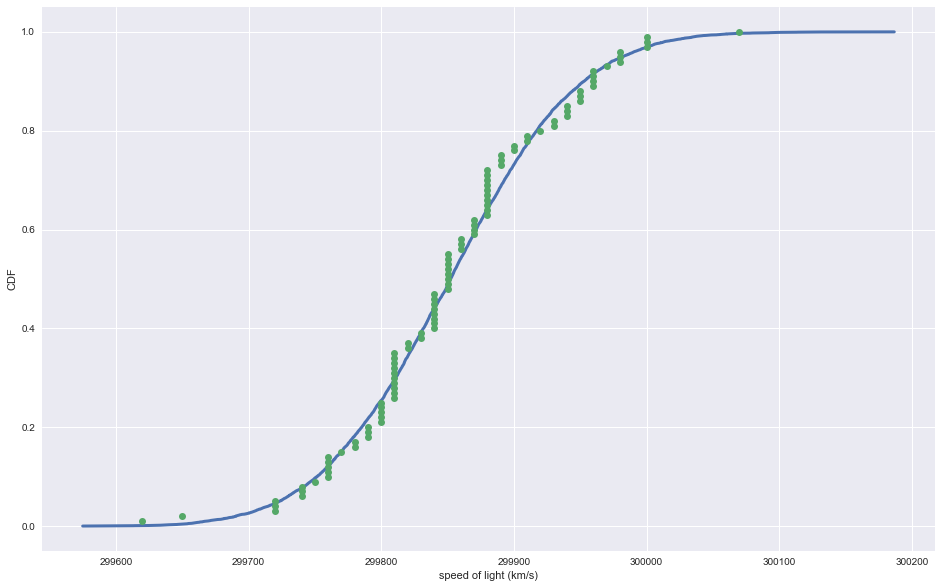

In [94]:
plt.figure(figsize=(16,10))
plt.plot(x_theor, y_theor, linewidth = 3)
plt.plot(x, y, marker = 'o', linestyle = 'none')
plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')
plt.show()

- Oh yeah, that looks normally distributed alright

### The Normal PDF

### The Normal CDF

## The Normal distribution: Properties and warnings

- Also called the Gaussian distribution after its inventor. 
 - German named Karl Gauss (probably one of the smartest guys ever)
- It is used to described most symmetric peaked data
- Most statical procedures have normally assumption present
- Its ubiquitous in nature


- Be careful of treating data normally when its not
- Its very rare to have data past 4 std on a normal distribution
- Just be aware if you are making that assumption to use other statistics methods

### Are the Belmont Stakes results Normally distributed?
- Converting the time string to seconds was really annoying
 - there must be a better way, but I have not learned how best to work with times in python
 - So I made a function that works.
 - split did not work on a pandas series so I have to loop it. 
 - and float did not work on the array. 
 - I'm sure there is a better way. 

In [95]:
file = 'https://assets.datacamp.com/production/course_1549/datasets/belmont.csv'
belmont = pd.read_csv(file)
belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


In [164]:
def to_seconds(time):
    time_s = []
    for t in time:
        t = t.split(':')
        t = [float(x) for x in t]
        t = t[0]*60 + t[1]
        time_s.append(t)
    return time_s

belmont_no_outliers = to_seconds(belmont.Time[(belmont.Year != 1973) & (belmont.Year != 1970)])


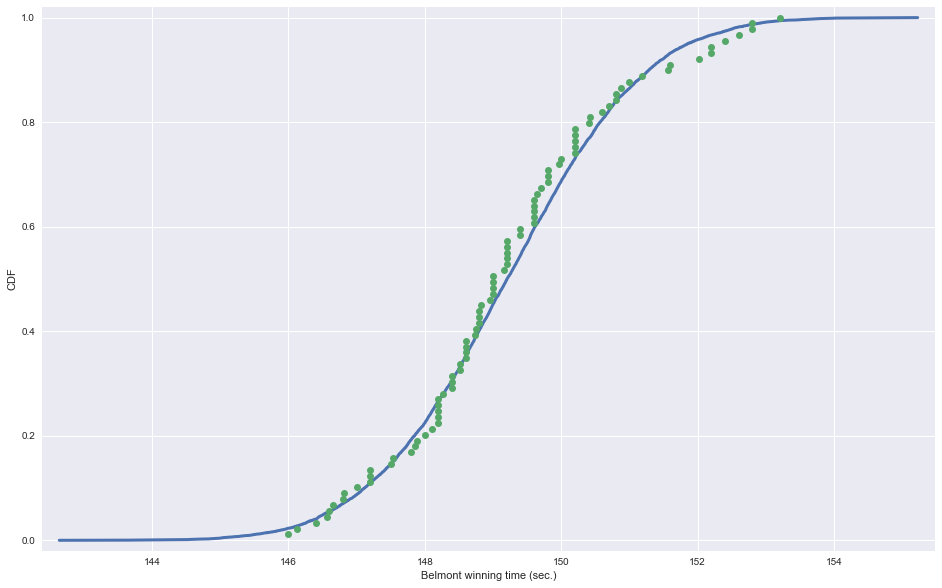

In [165]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
plt.figure(figsize=(16,10))
_ = plt.plot(x_theor, y_theor, linewidth = 3)
_ = plt.plot(x, y, marker='o', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


### What are the chances of a horse matching or beating Secretariat's record?

In [166]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size = 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000593


## The Exponential distribution

- There are many named continuous distributions (just like discrete)
- The waiting time between arrivals of a poisson process is Exponentially distributed
- We have th power of a computer. If we can simulate as story we can gets its distribution

### Waiting for the next Secretariat

- A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.

### If you have a story, you can simulate it!
- Sometimes, the story describing our probability distribution does not have a named distribution to go along with it.
- In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

- In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. 
- Hitting the cycle is another rare baseball event. 
 - When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. 
 - Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

- How long must we wait to see both a no-hitter and a batter hit the cycle? 
 - The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. 
 - Stated another way, what is the total waiting time for the arrival of two different Poisson processes? 
 - The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

- Now, you will write a function to sample out of the distribution described by this story.

In [173]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

### Distribution of no-hitters and cycles

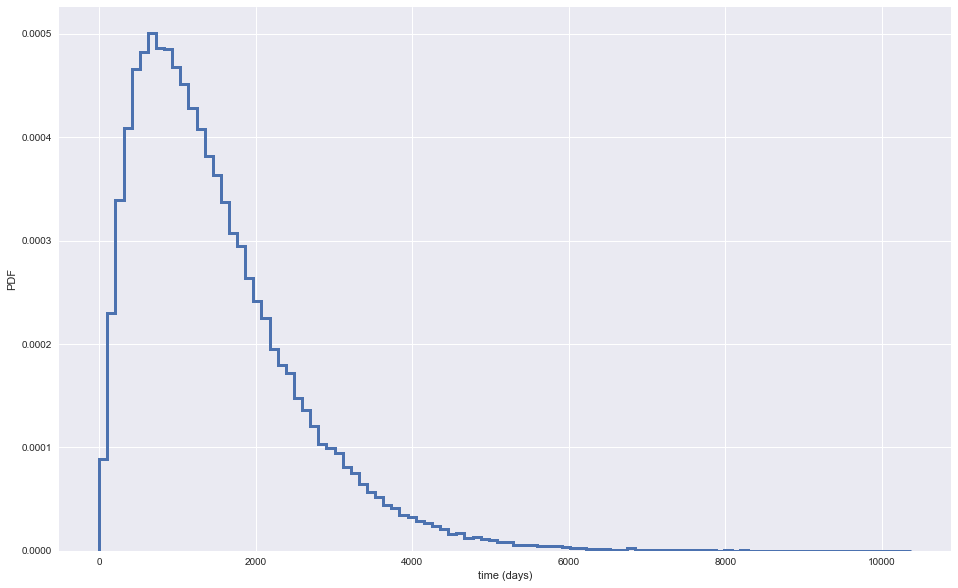

In [174]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
plt.figure(figsize=(16,10))
plt.hist(
    waiting_times,
    linewidth = 3,
    bins = 100,
    normed=True,
    histtype = 'step')


# Label axes
plt.xlabel('time (days)')
plt.ylabel('PDF')


# Show the plot
plt.show()
